Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 5**: Consider measuring the viscosity of a liquid by timing how long it takes a solid sphere to fall a specific distance in the liquid. Calculate the viscosity according to $$\mu=2\,(\rho_{S}-\rho_{L})\,\frac{g\,r^{2}\,t}{9\,l},$$ where $\rho_{S}$ and $\rho_{L}$ are the densities of the sphere and liquid respectively, $g=9.81$ms$^{-2}$ is the gravitational acceleration, $r$ the radius of the sphere, $l$ the length of the fall and $t$ the time it takes to fall the length $l$.

**Calculation data and errors**: The density numbers will have errors to consider. For the sphere, the mass is given as $m_{S}=0.021$ kg with uncertainty of $5\times10^{-4}$ kg and the radius is $0.01$ m with uncertainty of $5\times10^{-4}$ m.

For the liquid, the volume is given as $0.1$ m$^{3}$ with uncertainty of $5\times10^{-4}$ m$^{3}$ and mass of $0.14$ kg and uncertainty of $5\times10^{-4}$ kg.

The fall distance is marked as $0.1$ m and uncertainty $5\times10^{-4}$ m while the time measurement is taken as $3.2$ s with uncertainty $0.05$ s.

All uncertainties are assumed to be Gaussian distributed and hence given as single standard deviation precision. All given measurement values are considered to be independent from each other.

**Task**: Before purchasing equipment for this experiment and spending time and effort, you wish to check how precisely the viscosity can be determined in this case. Write a function `viscosity(err1, err2)` which calculates the array of viscosities according to the random error arrays `err1` and `err2` as input. 

**(a)** Write a Monte-Carlo simulation to find the distribution of viscosity measurements you could be taking if this experiment were to be performed. Simulate 1000 experiments, plot the viscosity distribution as a histogram with appropriate axes labels and print the mean and standard deviation.



Mean =  35.016065557952004
Standard Deviation =  1.1844610597619112


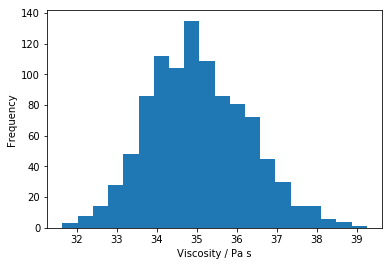

The variable that should be reduced to have the greatest benefit is: Radius of sphere


"I've answered part B in the executed function, so I don't think I have to type it out."

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

"""PART A"""

def viscosity(err1, err2):
    #arrayfvalues = [masph,rads,vol,mliq,dis,tim]
    av = [0.021,0.01,0.1,0.14,0.1,3.2]
    listboy = []
    if isinstance(err1,np.ndarray):
        for i in np.arange(len(err1)):
            e1 = random.choice(err1)
            e2 = random.choice(err2)
            rhos = (av[0]+e1)/((4/3)*np.pi*(av[1]+e1)**3)
            rhop = (av[3]+e1)/(av[2]+e1)
            mu = 2*(rhos-rhop)*((9.81*(av[5]+e2)*((av[1]+e1)**2))/(9*(av[4]+e1)))
            listboy.append(mu)
        return listboy
    else:
        rhos = (av[0])/((4/3)*np.pi*(av[1])**3)
        rhop = (av[3])/(av[2])
        mu = 2*(rhos-rhop)*((9.81*(av[5])*((av[1])**2))/(9*(av[4])))
        return mu

err1 = np.random.normal(0.0, 0.0005, 1000)
err2 = np.random.normal(0.0, 0.05, 1000)

print("Mean = ",np.mean(viscosity(err1,err2)))
print("Standard Deviation = ",np.std(viscosity(err1,err2)))
plt.hist(viscosity(err1,err2),20)
plt.xlabel("Viscosity / Pa s")
plt.ylabel("Frequency")
plt.show()

"""PART B"""
#Ignoring time because you can't physically change it

err3 = np.random.normal(0.0, 0.000005, 1000)

def visc(err1,err2,err3,err4,err5):
    av = [0.021,0.01,0.1,0.14,0.1,3.2]
    listboy = []
    for i in np.arange(len(err1)):
        e1 = random.choice(err1)
        e2 = random.choice(err2)
        e3 = random.choice(err3)
        e4 = random.choice(err4)
        e5 = random.choice(err5)
        rhos = (av[0]+e1)/((4/3)*np.pi*(av[1]+e2)**3)
        rhop = (av[3]+e4)/(av[2]+e3)
        mu = 2*(rhos-rhop)*((9.81*(av[5])*((av[1]+e2)**2))/(9*(av[4]+e5)))
        listboy.append(mu)
    return listboy

e = [err3,err3,err3,err3,err3,err1,err3,err3,err3,err3,err3]
stds = []
for x in np.arange(4):
    stds.append(np.std(visc(e[x],e[x+1],e[x+2],e[x+3],e[x+4])))
var = 0
count = 0
final = 0
for y in stds:
    if y>var:
        var=y
        final = count
    count += 1
thing = ["Mass of sphere", "Radius of sphere", "Volume of liquid", "Mass of liquid", "Distance fallen"]
print("The variable that should be reduced to have the greatest benefit is:",thing[final])

"""I've answered part B in the executed function, so I don't think I have to type it out."""

**(b)** Determine by computer experiment (iterate: change parameter, run) how to improve the viscosity precision most effectively. Consider changing individual observable uncertainty scales, one by one by the same fraction, re-run the simulation and observe the effect such a change has on the viscosity distribution width. 

Which observable uncertainty reduced to a smaller value would have the biggest beneficial effect on viscosity measurements? Name the observable in the text box below. Hint: you should notice one stand-out candidate observable.

Radius of sphere

In [5]:
# Test cell
mu0 = viscosity(0.0, 0.0)
assert (mu0>34.9 and mu0<35.0)

In [6]:
# Test cell
err1 = np.random.normal(0.0, 0.0005, 1000)
err2 = np.random.normal(0.0, 0.05, 1000)
mu = viscosity(err1, err2)
assert (np.mean(mu)>34.8 and np.mean(mu)<35.2)
assert (np.std(mu)>1.1 and np.std(mu)<1.3)

### Tests - 4 marks; Style - 1 mark; Plot - 2 marks